In [1]:
# Importing all the necessary libraries.
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split 
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore') 
import pandas as pd 
import numpy as np 
credit_df = pd.read_csv("loanStats.csv") 

In [2]:
#understanding the dataset
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104499 entries, 0 to 104498
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               104499 non-null  int64  
 1   member_id        104499 non-null  int64  
 2   loan_amnt        104499 non-null  int64  
 3   funded_amnt      104499 non-null  int64  
 4   funded_amnt_inv  104499 non-null  int64  
 5   term             104499 non-null  int64  
 6   int_rate         104499 non-null  float64
 7   home_ownership   104499 non-null  object 
 8   annual_inc       104499 non-null  int64  
 9   purpose          104499 non-null  object 
 10  total_pymnt      104499 non-null  float64
 11  total_rec_prncp  104499 non-null  float64
 12  total_rec_int    104499 non-null  float64
 13  loan_status      104499 non-null  int64  
dtypes: float64(4), int64(8), object(2)
memory usage: 11.2+ MB


In [3]:
#ID columns will not be of any significance for the model so we remove it from the dataset
credit_df=credit_df.drop(columns=['member_id','id'])

In [4]:
#finding target variable count to check if the dataset is balanced or imbalanced
credit_df.loan_status.value_counts() 

1    93692
0    10807
Name: loan_status, dtype: int64

In [5]:
#the dataset is highly imbalanced so we upsample the dataset
## Importing resample from *sklearn.utils* package. 
from sklearn.utils import resample 
# Separate the case of yes-subscribes and no-subscribes 
non_defaulters = credit_df[credit_df.loan_status == 1] 
defaulters = credit_df[credit_df.loan_status == 0] 
##Upsample the yes-subscribed cases. 
df_minority_upsampled = resample(defaulters, replace=True,  n_samples=80000) 
# Combine majority class with upsampled minority class 
credit_df = pd.concat([non_defaulters, df_minority_upsampled]) 

In [6]:
credit_df.loan_status.value_counts()

1    93692
0    80000
Name: loan_status, dtype: int64

In [7]:
#checking for null values
credit_df.isnull().sum()

loan_amnt          0
funded_amnt        0
funded_amnt_inv    0
term               0
int_rate           0
home_ownership     0
annual_inc         0
purpose            0
total_pymnt        0
total_rec_prncp    0
total_rec_int      0
loan_status        0
dtype: int64

In [8]:
credit_df.purpose.value_counts()

debt_consolidation    93645
credit_card           32330
other                 26058
home_improvement      21659
Name: purpose, dtype: int64

In [9]:
credit_df = credit_df.fillna(" ")

In [10]:
#top 5 instances of the dataset
credit_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,home_ownership,annual_inc,purpose,total_pymnt,total_rec_prncp,total_rec_int,loan_status
0,5000,5000,4975,36,10.65,OWN,1896,credit_card,5861.07,5000.00,861.07,1
2,2400,2400,2400,36,15.96,OWN,3300,other,3003.65,2400.00,603.65,1
3,10000,10000,10000,36,13.49,OWN,3500,other,12226.30,10000.00,2209.33,1
4,3000,3000,3000,60,12.69,OWN,3600,other,2496.48,1615.66,880.82,1
5,5000,5000,5000,36,7.90,OWN,4000,other,5631.38,5000.00,631.38,1


Positive examples = 93692
Negative examples = 80000
Proportion of negative to positive examples = 85.39%


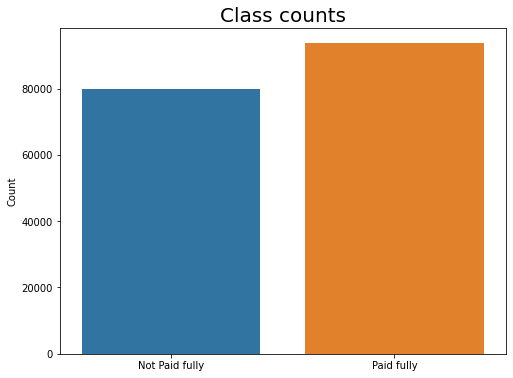

In [11]:
# Get number of positve and negative examples
pos = credit_df[credit_df["loan_status"] == 1].shape[0]
neg = credit_df[credit_df["loan_status"] == 0].shape[0]
print(f"Positive examples = {pos}")
print(f"Negative examples = {neg}")
print(f"Proportion of negative to positive examples = {(neg / pos) * 100:.2f}%")
plt.figure(figsize=(8, 6))
sn.countplot(credit_df["loan_status"])
plt.xticks((0, 1), ["Not Paid fully", "Paid fully"])
plt.xlabel("")
plt.ylabel("Count")
plt.title("Class counts", y=1, fontdict={"fontsize": 20});

In [12]:
#replacing missing values with mean of their coulmns.
credit_df['loan_amnt'].fillna((credit_df['loan_amnt'].mean()), inplace=True)
credit_df['funded_amnt'].fillna((credit_df['funded_amnt'].mean()), inplace=True)
credit_df['funded_amnt_inv'].fillna((credit_df['funded_amnt_inv'].mean()), inplace=True)
credit_df['term'].fillna((credit_df['term'].mean()), inplace=True)
credit_df['annual_inc'].fillna((credit_df['annual_inc'].mean()), inplace=True)
credit_df['int_rate'].fillna((credit_df['int_rate'].mean()), inplace=True)
credit_df['home_ownership'].fillna(('RENT'), inplace=True)
credit_df['loan_status'].fillna((0), inplace=True)

In [13]:
credit_df.isnull().sum()

loan_amnt          0
funded_amnt        0
funded_amnt_inv    0
term               0
int_rate           0
home_ownership     0
annual_inc         0
purpose            0
total_pymnt        0
total_rec_prncp    0
total_rec_int      0
loan_status        0
dtype: int64

In [14]:
credit_df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,annual_inc,total_pymnt,total_rec_prncp,total_rec_int,loan_status
count,173692.000000,173692.000000,173692.000000,173692.000000,173692.000000,1.736920e+05,173692.000000,173692.000000,173692.000000,173692.000000
mean,13152.896650,13009.695467,12558.372366,43.419755,14.213848,6.897495e+04,8050.118480,5758.722133,2102.162525,0.539415
std,8160.308286,8065.120556,8172.133429,11.091531,4.404121,6.850240e+04,6763.825954,5628.106675,2087.106299,0.498446
min,500.000000,500.000000,0.000000,36.000000,5.420000,1.896000e+03,0.000000,0.000000,0.000000,0.000000
25%,7000.000000,6850.000000,6000.000000,36.000000,10.990000,4.200000e+04,3431.100000,2010.010000,736.790000,0.000000
50%,11500.000000,11200.000000,10625.000000,36.000000,13.980000,5.700000e+04,6103.680000,3955.340000,1432.870000,1.000000
75%,18000.000000,18000.000000,17500.000000,60.000000,17.100000,8.300000e+04,10608.500000,7544.620000,2720.140000,1.000000
max,35000.000000,35000.000000,35000.000000,60.000000,26.060000,6.000000e+06,55758.200000,35000.000000,20848.700000,1.000000


In [15]:
#treating outliers using quantriles
Q1 = credit_df.quantile(0.25)
Q3 = credit_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

loan_amnt          11000.00
funded_amnt        11150.00
funded_amnt_inv    11500.00
term                  24.00
int_rate               6.11
annual_inc         41000.00
total_pymnt         7177.40
total_rec_prncp     5534.61
total_rec_int       1983.35
loan_status            1.00
dtype: float64


In [16]:
credit_df = credit_df[~((credit_df < (Q1 - 1.5 * IQR)) |(credit_df > (Q3 + 1.5 * IQR))).any(axis=1)]
credit_df.shape

(144509, 12)

In [17]:
credit_df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,annual_inc,total_pymnt,total_rec_prncp,total_rec_int,loan_status
count,144509.000000,144509.000000,144509.000000,144509.000000,144509.000000,144509.000000,144509.000000,144509.000000,144509.000000,144509.000000
mean,11321.665779,11194.709499,10739.824274,42.396224,13.798990,61909.716371,6250.775629,4482.851351,1596.291765,0.514771
std,6645.725463,6554.227791,6657.180213,10.611243,4.216667,27326.201178,4119.452014,3537.887886,1240.542906,0.499784
min,500.000000,500.000000,0.000000,36.000000,5.420000,1896.000000,0.000000,0.000000,0.000000,0.000000
25%,6000.000000,6000.000000,5575.000000,36.000000,10.990000,42000.000000,3093.580000,1831.490000,665.710000,0.000000
50%,10000.000000,10000.000000,9975.000000,36.000000,13.670000,55000.000000,5404.290000,3487.730000,1256.940000,1.000000
75%,15000.000000,15000.000000,14952.000000,60.000000,16.320000,78500.000000,8634.080000,6201.890000,2213.290000,1.000000
max,34475.000000,34475.000000,34475.000000,60.000000,26.060000,144500.000000,21215.100000,15825.000000,5693.640000,1.000000


In [18]:
#converting categorical variables to numeric using label encoding
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
cat=['home_ownership','purpose']
for var in cat:
    le = preprocessing.LabelEncoder()
    credit_df[var]=le.fit_transform(credit_df[var].astype('str'))
credit_df.dtypes

loan_amnt            int64
funded_amnt          int64
funded_amnt_inv      int64
term                 int64
int_rate           float64
home_ownership       int32
annual_inc           int64
purpose              int32
total_pymnt        float64
total_rec_prncp    float64
total_rec_int      float64
loan_status          int64
dtype: object

In [19]:
#final dataset after preprocessing
credit_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,home_ownership,annual_inc,purpose,total_pymnt,total_rec_prncp,total_rec_int,loan_status
0,5000,5000,4975,36,10.65,1,1896,0,5861.07,5000.00,861.07,1
2,2400,2400,2400,36,15.96,1,3300,3,3003.65,2400.00,603.65,1
3,10000,10000,10000,36,13.49,1,3500,3,12226.30,10000.00,2209.33,1
4,3000,3000,3000,60,12.69,1,3600,3,2496.48,1615.66,880.82,1
5,5000,5000,5000,36,7.90,1,4000,3,5631.38,5000.00,631.38,1


In [20]:
#spliting variables into features and targets and hennce into train and test sets
features = credit_df.drop(columns=['loan_status'])
targets = pd.DataFrame(credit_df['loan_status'])

# Split into 80% training and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(115607, 11)
(28902, 11)
(115607, 1)
(28902, 1)


In [21]:
# # # Models to Evaluate
# We will compare three different machine learning Cassification models:
# 1 - Naive Bayes
# 2 - Logistic Regression
# 3 - Random Forest Classification

# Function to calculate mean absolute error
def cross_val(X_train, y_train, model):
    # Applying k-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
    return accuracies.mean()

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_cross = cross_val(X_train, y_train, model)
    
    # Return the performance metric
    return model_cross

In [22]:
# # Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
# Convert y to one-dimensional array (vector)
y_train = np.array(y_train).reshape((-1, ))
y_test = np.array(y_test).reshape((-1, ))

In [24]:
credit_df.home_ownership.value_counts()

1    66383
0    65244
2    12882
Name: home_ownership, dtype: int64

In [25]:
# # Naive Bayes
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive_cross = fit_and_evaluate(naive)

print('Naive Bayes Performance on the test set: Cross Validation Score = %0.4f' % naive_cross)

Naive Bayes Performance on the test set: Cross Validation Score = 0.7043


In [26]:
# # logistic regression Classification
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_cross = fit_and_evaluate(lr)

print('logistic regression Classification Performance on the test set: Cross Validation Score = %0.4f' % lr_cross)

logistic regression Classification Performance on the test set: Cross Validation Score = 0.8167


In [27]:
pred_y_lr = lr.predict(X_test) 

In [28]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
def draw_cm( actual, predicted ):      
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )    
    sn.heatmap(cm, annot=True,  fmt='.2f',  xticklabels = ["Good credit", "Bad Credit"] , yticklabels = ["Good credit", "Bad Credit"] )    
    plt.ylabel('True label')    
    plt.xlabel('Predicted label')    
    plt.show() 

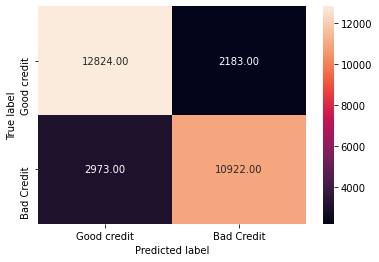

              precision    recall  f1-score   support

           0       0.83      0.79      0.81     13895
           1       0.81      0.85      0.83     15007

    accuracy                           0.82     28902
   macro avg       0.82      0.82      0.82     28902
weighted avg       0.82      0.82      0.82     28902



In [29]:
#drawing confusion matrix
cm = draw_cm( y_test, pred_y_lr ) 
cm
print( metrics.classification_report( y_test, pred_y_lr) ) 

In [30]:
# # Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
random_cross = fit_and_evaluate(random)

print('Random Forest Performance on the test set: Cross Validation Score = %0.4f' % random_cross)

Random Forest Performance on the test set: Cross Validation Score = 0.9949


In [31]:
pred_y_rf = random.predict(X_test) 

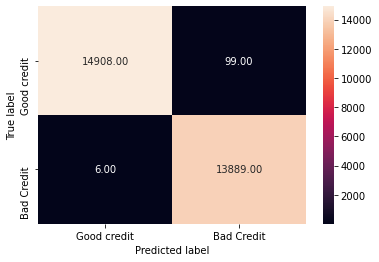

In [32]:
cm = draw_cm( y_test, pred_y_rf ) 
cm

In [33]:
print( metrics.classification_report( y_test, pred_y_rf) ) 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     13895
           1       1.00      0.99      1.00     15007

    accuracy                           1.00     28902
   macro avg       1.00      1.00      1.00     28902
weighted avg       1.00      1.00      1.00     28902



In [34]:
#deploying the model using pickle
import pickle

In [35]:
pickle.dump(random,open('model.pkl','wb'))

In [36]:
model = pickle.load(open('model.pkl','rb'))

In [37]:
if (model.predict([[8000,8000,8000,36,7.49,2,32000,1,8050.31,8000.00,50.31]])==0):
    print("You will default the loan")
else:
    print("You will not default the loan")

You will not default the loan


In [38]:
#Final prediction
if (model.predict([[5600,5600,5600,60,21.28,2,4080,3,646.02,162.02,294.95]])==1):
    print("You will default the loan")
else:
    print("You will not default the loan")

You will not default the loan
